# Time series Forcasting

## Arema

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
sales = pd.read_csv('F:\Skillenable\Data frames\sales-cars (1).csv')
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [3]:
sales.shape

(36, 2)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   36 non-null     object
 1   Sales   36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [5]:
# convert date column in datetime format since the month is in string format
from datetime import datetime

In [6]:
# changing the datatype
sales['Month'] = pd.to_datetime(sales.Month)
sales.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 704.0 bytes


In [8]:
# converting the month column as index
sales.set_index('Month', inplace = True)

In [9]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


<AxesSubplot:xlabel='Month'>

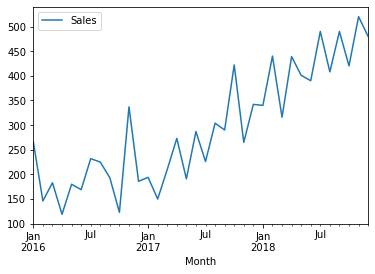

In [10]:
# visualise the data to see the trend

sales.plot()

- The trend is seems non stationary 
- to confirm we'll perform  statistical test (ACF)

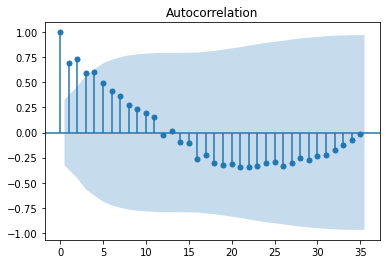

In [11]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(sales.Sales, lags=35)

In [12]:
# Here from the plot, we can see this is decaying, hence it can be an autoregrassive process

## Converting the series to stationary (We need to make it stationary to apply time series)

In [13]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [14]:
sales_diff = sales.diff(periods=1)   # integrated of order 1, denoted by d(for diff)
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [15]:
sales_diff = sales_diff[1:] # this step will remove 1st nan value 
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


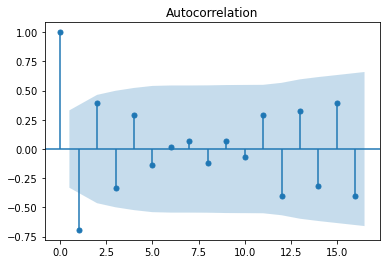

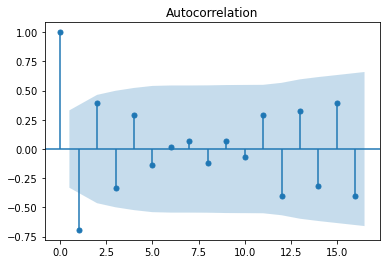

In [16]:
# plotting ACF for sales_diff
plot_acf(sales_diff)

<AxesSubplot:xlabel='Month'>

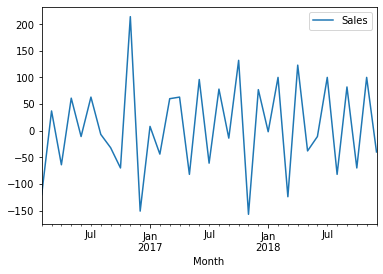

In [17]:
sales_diff.plot() # We can see that the plot is now stationary

In [18]:
# Building the model

# Step1: spliting the data train and test (80:20)

X = sales.values
train = X[0:27]      # defining training data
test = X[27:]        # defining test data
prediction=[]



# Autoressive Model: AR